Investigating trending skilll

In [29]:
# Importing Libraries
import ast
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [30]:
df_da = df[df['job_title_short']== 'Data Analyst'].copy()

In [31]:
df_da['months'] = df_da['job_posted_date'].dt.month

In [32]:
df_da_explode = df_da.explode('job_skills')

In [33]:
df_da_explode_piviot = df_da_explode.pivot_table(index= 'months', columns= 'job_skills', aggfunc= 'size',fill_value= 0)

In [34]:
df_da_explode_piviot.loc['total'] = df_da_explode_piviot.sum()

In [46]:
df_da_explode_piviot= df_da_explode_piviot[df_da_explode_piviot.loc['total'].sort_values(ascending=False).index]

df_da_explode_piviot =df_da_explode_piviot.drop('total')

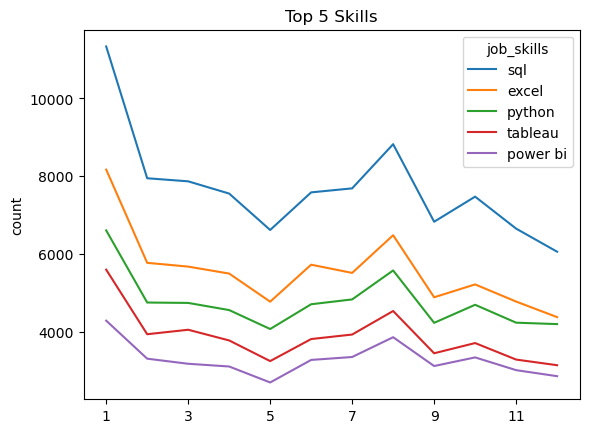

In [55]:
df_da_explode_piviot.iloc[:,0:5].plot(kind='line')
plt.title('Top 5 Skills')
plt.xlabel('')
plt.ylabel('count')
plt.show()